# Library Imports

Library imports for relevant data science, ML, etc... libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Reading and Analysing the Data

Read the comma sepèrated value data file and store it as a variable. Additionally, display the data to show the file has been read correctly.

In [2]:
dataset = pd.read_csv('mars-weather.csv')
dataset

,id,terrestrial_date,sol,ls,month,min_temp,max_temp,pressure,wind_speed,atmo_opacity
0,1895,2018-02-27,1977,135,Month 5,-77.0,-10.0,727.0,NaN,Sunny
1,1893,2018-02-26,1976,135,Month 5,-77.0,-10.0,728.0,NaN,Sunny
2,1894,2018-02-25,1975,134,Month 5,-76.0,-16.0,729.0,NaN,Sunny
3,1892,2018-02-24,1974,134,Month 5,-77.0,-13.0,729.0,NaN,Sunny
4,1889,2018-02-23,1973,133,Month 5,-78.0,-18.0,730.0,NaN,Sunny
...,...,...,...,...,...,...,...,...,...,...
1889,24,2012-08-18,12,156,Month 6,-76.0,-18.0,741.0,NaN,Sunny
1890,13,2012-08-17,11,156,Month 6,-76.0,-11.0,740.0,NaN,Sunny
1891,2,2012-08-16,10,155,Month 6,-75.0,-16.0,739.0,NaN,Sunny
1892,232,2012-08-15,9,155,Month 6,NaN,NaN,NaN,NaN,Sunny


Here we will also take a look at the data, looking at types (which we can use to check for any non-numerical data), null counts, names, etc...

In [3]:
dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1894 non-null   int64  
 1   terrestrial_date  1894 non-null   object 
 2   sol               1894 non-null   int64  
 3   ls                1894 non-null   int64  
 4   month             1894 non-null   object 
 5   min_temp          1867 non-null   float64
 6   max_temp          1867 non-null   float64
 7   pressure          1867 non-null   float64
 8   wind_speed        0 non-null      float64
 9   atmo_opacity      1894 non-null   object 
dtypes: float64(4), int64(3), object(3)
memory usage: 148.1+ KB


,id,sol,ls,min_temp,max_temp,pressure,wind_speed
count,1894.000000,1894.000000,1894.000000,1867.000000,1867.000000,1867.000000,0.0
mean,948.372228,1007.930306,169.180570,-76.121050,-12.510445,841.066417,NaN
std,547.088173,567.879561,105.738532,5.504098,10.699454,54.253226,NaN
min,1.000000,1.000000,0.000000,-90.000000,-35.000000,727.000000,NaN
25%,475.250000,532.250000,78.000000,-80.000000,-23.000000,800.000000,NaN
50%,948.500000,1016.500000,160.000000,-76.000000,-11.000000,853.000000,NaN
75%,1421.750000,1501.750000,259.000000,-72.000000,-3.000000,883.000000,NaN
max,1895.000000,1977.000000,359.000000,-62.000000,11.000000,925.000000,NaN


Here we check for null values within the columns and rows within the dataset, this will aid any data preprocessing or feature engineering. Here we can see that the "wind_speed" column contains absolutely no values, therefore, this table will be dropped as it offers no useful data.

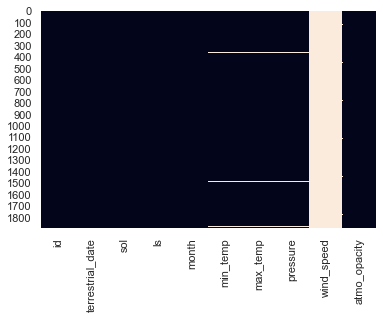

In [4]:
sns.heatmap(dataset.isnull(), cbar=False)

Drop the windspeed column as it contains unusable data, then check if the relevant columns have been dropped. Please note, if an error occurs in this file, the column has already likely been dropped.

,id,terrestrial_date,sol,ls,month,min_temp,max_temp,pressure,atmo_opacity
0,1895,2018-02-27,1977,135,Month 5,-77.0,-10.0,727.0,Sunny
1,1893,2018-02-26,1976,135,Month 5,-77.0,-10.0,728.0,Sunny
2,1894,2018-02-25,1975,134,Month 5,-76.0,-16.0,729.0,Sunny
3,1892,2018-02-24,1974,134,Month 5,-77.0,-13.0,729.0,Sunny
4,1889,2018-02-23,1973,133,Month 5,-78.0,-18.0,730.0,Sunny


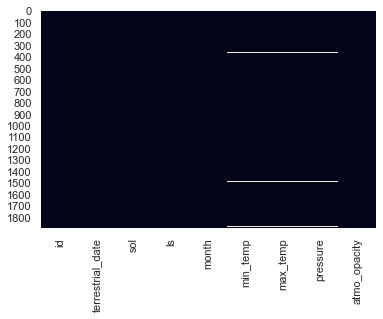

In [5]:
dataset = dataset.drop(['wind_speed'], axis = 1) 

sns.heatmap(dataset.isnull(), cbar=False)
dataset.head()

Here we look for data columns which contain non-numerical data, then show what kind of data it contains.

In [6]:
non_numerical_columns=dataset.select_dtypes(include='object')

non_numerical_columns.sample(20)

,terrestrial_date,month,atmo_opacity
63,2017-12-24,Month 4,Sunny
1579,2013-07-29,Month 12,Sunny
905,2015-07-30,Month 1,Sunny
1660,2013-05-07,Month 11,Sunny
908,2015-07-27,Month 1,Sunny
1443,2014-01-11,Month 3,Sunny
1624,2013-06-13,Month 12,Sunny
1629,2013-06-08,Month 12,Sunny
166,2017-09-09,Month 2,Sunny
1289,2014-06-18,Month 5,Sunny


Change the type of data contained within terrestrial_date from a String into a DateTime format. We will also drop the month and atmo_opacity columns as well. Then check if the datatype change has been applied. 

In [7]:
dataset['terrestrial_date']=pd.to_datetime(dataset['terrestrial_date'])
#dataset = dataset.drop(['month'], axis = 1) 
#dataset = dataset.drop(['atmo_opacity'], axis = 1) 

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1894 non-null   int64         
 1   terrestrial_date  1894 non-null   datetime64[ns]
 2   sol               1894 non-null   int64         
 3   ls                1894 non-null   int64         
 4   month             1894 non-null   object        
 5   min_temp          1867 non-null   float64       
 6   max_temp          1867 non-null   float64       
 7   pressure          1867 non-null   float64       
 8   atmo_opacity      1894 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(2)
memory usage: 133.3+ KB


Here we examine the minimum and maximum temperature of Mars (in Degrees Celcius) against the occurance percentage. Then we check for any null values contained within the max_temp column.

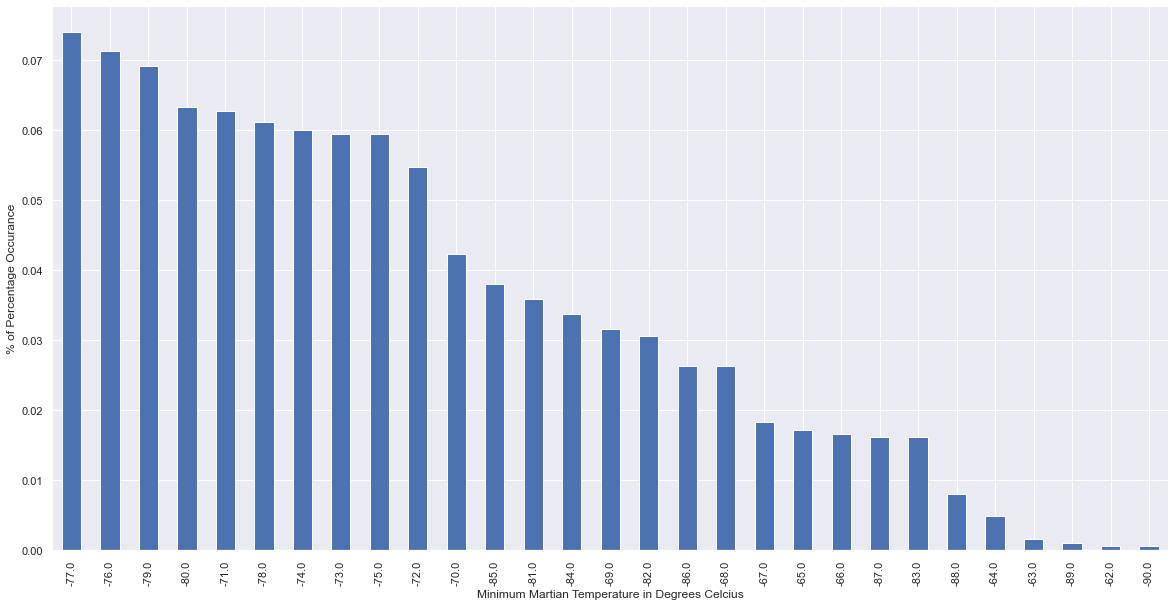

In [8]:
plt.figure(figsize=(20,10))
dataset.iloc[:,5].value_counts(normalize=True,sort=True).plot(kind='bar')
plt.xlabel('Minimum Martian Temperature in Degrees Celcius')
plt.ylabel('% of Percentage Occurance')
plt.show()

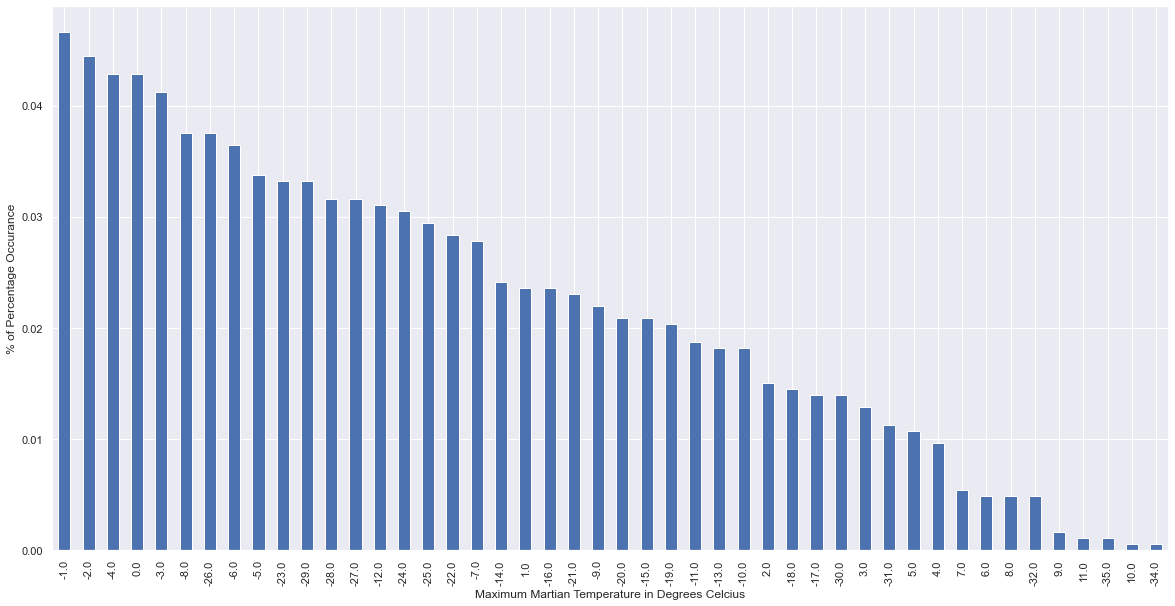

In [9]:
plt.figure(figsize=(20,10))
dataset.iloc[:,6].value_counts(normalize=True,sort=True).plot(kind='bar')
plt.xlabel('Maximum Martian Temperature in Degrees Celcius')
plt.ylabel('% of Percentage Occurance')
plt.show()

In [10]:
maxtemp_nulls = dataset['max_temp'].isnull().values.any()
nullcount = dataset['max_temp'].isnull().sum()

print ("Is null values?:", maxtemp_nulls)
print ('Null count in column: ' + str(nullcount))

Is null values?: True
Null count in column: 27


Here we convert the month column from String to Datetime, then refer to how many values are contained within each month.

In [11]:
dataset['month']=pd.to_datetime(dataset.terrestrial_date).dt.to_period('M')

dataset.month.value_counts()

2017-12    31
2013-01    31
2016-08    31
2014-05    31
2014-10    31
           ..
2015-01    23
2016-07    21
2012-08    18
2013-11    17
2013-03    11
Freq: M, Name: month, Length: 67, dtype: int64

Here we examine the max_temp columnm, group each max_temp value by the month it was contained within, then remove each null value contained within this month. Please note, if this data produces errors, restart the Jupyter Kernal and re-run the entire program.

In [12]:
a=dataset.iloc[:,6].name
c=dataset.groupby(by='month')[a].mean()
b=dataset['max_temp'].isna()
dataset.loc[b,['max_temp']]=dataset.loc[b,'month'].apply(lambda x:c[x])
dataset['max_temp'].isna().sum()

0

Finally, we analyse each grouped mean temperature for certain dates on the original dataset, we examine two values of the date and the maximum temperature in Degrees Celcius and put these two values within their own dataframe. We use this to find the mean maximum Martian temperature based on the day, month and year, this is based against the terrestrial date it occured on.

In [13]:
reformed_dataset=pd.DataFrame(list(dataset['max_temp']),index=dataset.terrestrial_date,columns=['max_celc_temp'])
reformed_dataset=reformed_dataset.resample('D').mean()
month_df=reformed_dataset.resample('M').mean()
year_df=reformed_dataset.resample('Y').mean()
print(year_df)

                  max_celc_temp
terrestrial_date               
2012-12-31            -4.876353
2013-12-31           -10.547528
2014-12-31           -11.377465
2015-12-31           -14.744816
2016-12-31           -10.002899
2017-12-31           -17.362288
2018-12-31           -19.214286


In [14]:
print(month_df)

                  max_celc_temp
terrestrial_date               
2012-08-31           -10.615385
2012-09-30            -8.107143
2012-10-31            -1.600000
2012-11-30            -2.724138
2012-12-31            -3.666667
...                         ...
2017-10-31           -29.100000
2017-11-30           -27.827586
2017-12-31           -24.741935
2018-01-31           -21.933333
2018-02-28           -16.076923

[67 rows x 1 columns]


Additionally, the table above also shows that for each year, the mean maximum temperature on Mars has been increasing every year. This shows that climate change also occurs on Mars as well as Earth (note, climate change refers in this case to the change of a planet´s climate, not the manmade change made to climate, such as what is occuring now on Earth).

# Creating the CNN Model, Scaling and FittingThe Data

Import libraries from TensorFlows Keras API in order to create the CNN model. Then, define a sequential model using the Keras API, using a 1D conventional model with an additional 3 layers. Compile the model and create a reformed dataset using our two targets.

In [16]:
from keras.layers import Bidirectional,LSTM,Dense,Flatten,Conv1D,Conv2D,MaxPooling1D,Dropout,RepeatVector
from keras.models import Sequential
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
from sklearn.preprocessing import MinMaxScaler

model=Sequential([Conv1D(100,kernel_size=3,input_shape=(40,1),activation='relu'),
                  Conv1D(100,kernel_size=3),
                  Conv1D(100,kernel_size=3),
                  MaxPooling1D(2), Flatten(), RepeatVector(30),
                 LSTM(128,activation='relu',return_sequences=True),
                 LSTM(128,activation='relu',return_sequences=True),
                  Bidirectional(LSTM(64,activation='relu')), Dense(128,activation='relu'), Dense(128,activation='relu'), 
                  Dense(128,activation='relu'), Dense(1)])

model.compile(optimizer='adam',loss='mse',metrics=['accuracy'])

new_reformed_dataset=pd.DataFrame(list(dataset['max_temp']), index=dataset['terrestrial_date'], columns=['temp'])

new_reformed_dataset

,temp
terrestrial_date,
2018-02-27,-10.000000
2018-02-26,-10.000000
2018-02-25,-16.000000
2018-02-24,-13.000000
2018-02-23,-18.000000
...,...
2012-08-18,-18.000000
2012-08-17,-11.000000
2012-08-16,-16.000000


Use the Pandas library to resample the datetime data and to fill NA values within the maxtemp data with mean values contained within the data. Note that this action requires a kernal restart when run on Jupyter Notebook.

In [17]:
new_reformed_dataset=new_reformed_dataset.resample('d').mean()
print("Number of nulls in datetime: ", new_reformed_dataset.temp.isna().sum())

new_reformed_dataset.fillna(dataset['max_temp'].mean(),inplace=True)
print("Number of nulls in maxtemp: ", new_reformed_dataset.temp.isna().sum())

Number of nulls in datetime:  137
Number of nulls in maxtemp:  0


Scale the data from the new reformed dataset using a MinMax scaler from the sklearn preprocessing library. Please note the data has already been compiled into a list for usage.

In [18]:
scaler=MinMaxScaler(feature_range=(-1,1))
scaled_data=scaler.fit_transform(new_reformed_dataset)
scaled_data[:20]

array([[ 0.06020067],
       [-0.02116299],
       [-0.02116299],
       [-0.02116299],
       [-0.02116299],
       [-0.02116299],
       [-0.02116299],
       [-0.02116299],
       [ 0.06020067],
       [-0.17391304],
       [ 0.04347826],
       [-0.26086957],
       [-0.13043478],
       [-0.17391304],
       [-0.13043478],
       [ 0.52173913],
       [ 0.34782609],
       [ 0.06020067],
       [ 0.06020067],
       [ 0.06020067]])

Set the number of steps for fitting the machine learning model. Create the input and output arrays for the ML model.

In [19]:
from sklearn.model_selection import train_test_split

steps=40
scaled_inputs=[]
targets=[]

for i in range(len(scaled_data)-steps):
    scaled_inputs.append(scaled_data[i:i+steps])
    targets.append(scaled_data[i+steps])

Convert inputs and outputs into an array object. Then split the training and testing data.

In [20]:
scaled_inputs=np.asanyarray(scaled_inputs)
targets=np.asanyarray(targets)

train_test_split(scaled_inputs, targets)
x_train=scaled_inputs[:500,:,:] 
x_test=scaled_inputs[500:,:,:]
y_train=targets[:500] 
y_test=targets[500:]

Fit the model using the x and y training data. Please note, if this model experiences a high level of loss, please restart the kernal and re-run the code. It will be apparant if this model has experienced a high level of loss if the finalised graphs have extreme levels of data, overfitting or doesn´t look similar to the expected or actual data results. Also note we add an additional number of epochs for higher accuracy.

In [21]:
model.fit(x_train,y_train,epochs=30)

Epoch 1/30
16/16 [==============================] - 5s 111ms/step - loss: 0.0785 - accuracy: 0.0000e+00
Epoch 2/30
16/16 [==============================] - 2s 112ms/step - loss: 0.0470 - accuracy: 0.0000e+00
Epoch 3/30
16/16 [==============================] - 2s 119ms/step - loss: 0.0396 - accuracy: 0.0000e+00
Epoch 4/30
16/16 [==============================] - 2s 120ms/step - loss: 0.0328 - accuracy: 0.0000e+00
Epoch 5/30
16/16 [==============================] - 2s 120ms/step - loss: 0.0291 - accuracy: 0.0000e+00
Epoch 6/30
16/16 [==============================] - 2s 122ms/step - loss: 0.0282 - accuracy: 0.0000e+00
Epoch 7/30
16/16 [==============================] - 2s 126ms/step - loss: 0.0265 - accuracy: 0.0000e+00
Epoch 8/30
16/16 [==============================] - 2s 127ms/step - loss: 0.0222 - accuracy: 0.0000e+00
Epoch 9/30
16/16 [==============================] - 2s 126ms/step - loss: 0.0199 - accuracy: 0.0000e+00
Epoch 10/30
16/16 [==============================] - 2s 129ms/st

# Making the Predictive Model

Here we show the predictive results from the complete, scaled and fitted model. This model has a high degree of prediction as the predictive results from the training and test data match with the actual results, showing our model has an adequate degree of prediction.

In [22]:
predicted=model.predict(x_train)
predicted1=scaler.inverse_transform(predicted)
y_train=scaler.inverse_transform(y_train)

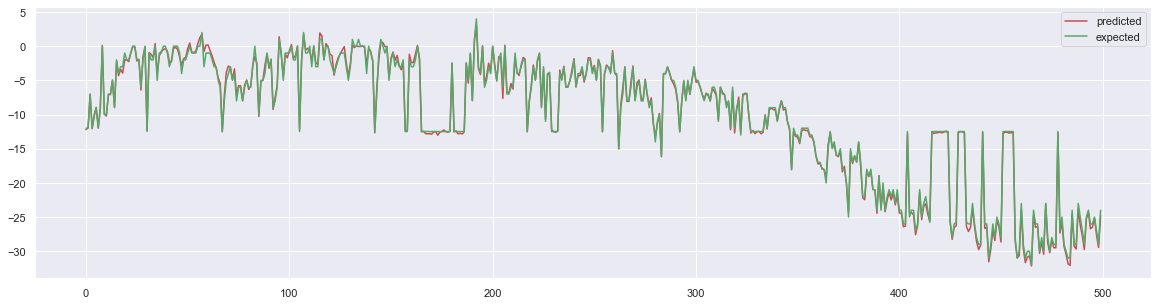

In [23]:
plt.figure(figsize=(20,5))
plt.plot(predicted1,'r',label='predicted')
plt.plot(y_train,'g',label='expected')
plt.legend()
plt.show()

In [24]:
predicted=model.predict(x_test)

In [25]:
predicted1=scaler.inverse_transform(predicted)

In [26]:
y_test=scaler.inverse_transform(y_test)

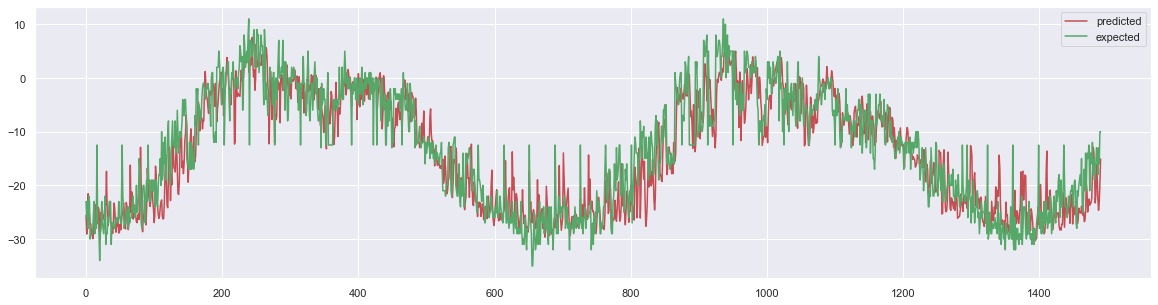

In [27]:
plt.figure(figsize=(20,5))
plt.plot(predicted1,'r',label='predicted')
plt.plot(y_test,'g',label='expected')
plt.legend()
plt.show()

After everything, we can evaluate our model on the training set. The accuracy is extremely low at 3.018% in this case, showing that the data is prone to overfitting.

In [28]:
model.evaluate(x_test, y_test)

47/47 [==============================] - 2s 32ms/step - loss: 281.0097 - accuracy: 0.0309


[281.0096740722656, 0.030851777642965317]

Finally, we can look at precision and other evaluative metrics of the model in the form of a classification report offered in the SkLearn.metrics library.

In [29]:
import sklearn.metrics as skmet

print(skmet.classification_report(y_test, predicted1))

ValueError: continuous is not supported